# **Классификация победителя раунда в матче CS:GO**
## Предсказание команды-победителя (CT или T)

## Описание
> Имеется 82 014 наборов данных, каждый из которых указывает на определённое состояние раунда в матче по игре Counter-Strike: Global Offensive. Наборы данных состоят из ряда известных признаков, в том числе количество живых игроков обеих команд, общее количество их очков здоровья, наличие у них тех или иных вооружений. Также известен target, команда-победитель в раунде, со значением CT, если победила команда контр-террористов, и T если победила команда террористов.
Требуется построить модель, предсказывающую значение признака target для 40 396 состояний раундов из тестового набора данных.
Мерой точности является доля правильных ответов (Accuracy).

> Ссылка: https://www.kaggle.com/competitions/csgo-classification-ru/overview

## Оценка


> Мерой точности является доля правильных ответов:

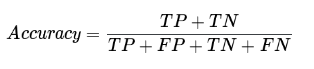



## Описание признаков

id	Идентификатор.	

time_left	Оставшееся время до конца текущего раунда.	

ct_score	Текущий счёт команды CT.	

t_score	Текущий счёт команды T.	

map	Карта матча.

bomb_planted	Наличие заложенной бомбы.

ct_health	Общее количество очков здоровья команды CT.

t_health	Общее количество очков здоровья команды T.

ct_armor	Общее количество очков брони команды CT.	

t_armor	Общее количество очков брони команды T.	

ct_money	Общее количество денег команды CT.	

t_money	Общее количество денег команды T.	

ct_helmets	Общее число шлемов в команде CT.	

t_helmets	Общее число шлемов в команде T.	

ct_defuse_kits	Общее число наборов сапёра в команде CT.	

ct_players_alive	Количество живых игроков в команде CT.

t_players_alive	Количество живых игроков в команде T.	

ct_weapon_X	Общее число оружия X в команде CT.

t_weapon_X	Общее число оружия X в команде T.

ct_grenade_X	Общее число гранат X в команде CT.

t_grenade_X	Общее число гранат X в команде T.

target	Победитель раунда.

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import numpy as np

In [2]:
pd.reset_option('max_columns')

In [3]:
url_sample_submission = "https://raw.githubusercontent.com/VsD-0/CS-GO-Machine_Learning/master/sample_submission.csv"
url_test = "https://raw.githubusercontent.com/VsD-0/CS-GO-Machine_Learning/master/test.csv"
url_train = "https://raw.githubusercontent.com/VsD-0/CS-GO-Machine_Learning/master/train.csv"

In [4]:
data = pd.read_csv(url_sample_submission)

In [5]:
train = pd.read_csv(url_train)

In [6]:
test = pd.read_csv(url_test)

In [7]:
data.head(1500)

,id,target
0,1,CT
1,2,T
2,3,CT
3,4,T
4,5,CT
...,...,...
1495,1496,T
1496,1497,CT
1497,1498,T
1498,1499,CT


In [8]:
train.head(10)

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,target
0,114.95,4.0,0.0,de_inferno,False,500.0,500.0,493.0,400.0,3600.0,...,2.0,5.0,1.0,4.0,0.0,0.0,2.0,0.0,0.0,CT
1,114.92,7.0,4.0,de_dust2,False,500.0,500.0,0.0,500.0,11950.0,...,5.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,T
2,74.88,4.0,6.0,de_overpass,False,270.0,200.0,292.0,200.0,1700.0,...,2.0,1.0,2.0,0.0,0.0,1.0,2.0,1.0,0.0,CT
3,21.46,1.0,1.0,de_nuke,True,100.0,268.0,100.0,385.0,150.0,...,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,T
4,175.00,9.0,6.0,de_mirage,False,500.0,500.0,200.0,300.0,2700.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
5,66.88,5.0,1.0,de_mirage,False,291.0,233.0,277.0,95.0,9700.0,...,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,T
6,94.89,2.0,7.0,de_train,False,434.0,480.0,489.0,499.0,8850.0,...,4.0,3.0,3.0,4.0,0.0,0.0,3.0,0.0,0.0,CT
7,74.91,0.0,2.0,de_dust2,False,29.0,180.0,73.0,187.0,950.0,...,1.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,T
8,94.90,9.0,13.0,de_nuke,False,500.0,400.0,400.0,364.0,600.0,...,3.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,T
9,14.12,5.0,6.0,de_inferno,False,484.0,349.0,500.0,478.0,5900.0,...,1.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,T


In [9]:
test.head(10)

,id,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,...,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
0,1,49.95,8.0,15.0,de_dust2,False,300.0,500.0,300.0,491.0,...,2.0,3.0,0.0,5.0,1.0,0.0,0.0,1.0,0.0,0.0
1,2,114.95,6.0,6.0,de_dust2,False,500.0,500.0,499.0,484.0,...,2.0,5.0,2.0,5.0,1.0,0.0,0.0,4.0,0.0,0.0
2,3,175.00,7.0,8.0,de_dust2,False,500.0,500.0,400.0,200.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4,14.92,0.0,4.0,de_overpass,False,232.0,320.0,300.0,311.0,...,1.0,1.0,0.0,3.0,1.0,0.0,0.0,2.0,0.0,0.0
4,5,37.52,13.0,11.0,de_train,True,290.0,422.0,291.0,415.0,...,3.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
5,6,54.96,5.0,4.0,de_dust2,False,203.0,478.0,267.0,477.0,...,3.0,3.0,0.0,2.0,0.0,0.0,0.0,4.0,0.0,0.0
6,7,94.94,4.0,2.0,de_dust2,False,372.0,456.0,0.0,464.0,...,0.0,5.0,0.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0
7,8,162.39,11.0,9.0,de_inferno,False,500.0,500.0,200.0,430.0,...,0.0,5.0,2.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0
8,9,94.91,12.0,14.0,de_train,False,473.0,478.0,494.0,494.0,...,2.0,2.0,3.0,4.0,3.0,0.0,0.0,1.0,0.0,0.0
9,10,109.89,2.0,7.0,de_inferno,False,500.0,500.0,500.0,500.0,...,4.0,5.0,5.0,5.0,4.0,0.0,0.0,5.0,0.0,0.0


In [17]:
test["target"] = data["target"]
test.drop("id", inplace=True, axis=1)
test

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,target
0,49.95,8.0,15.0,de_dust2,False,300.0,500.0,300.0,491.0,150.0,...,3.0,0.0,5.0,1.0,0.0,0.0,1.0,0.0,0.0,CT
1,114.95,6.0,6.0,de_dust2,False,500.0,500.0,499.0,484.0,10200.0,...,5.0,2.0,5.0,1.0,0.0,0.0,4.0,0.0,0.0,T
2,175.00,7.0,8.0,de_dust2,False,500.0,500.0,400.0,200.0,600.0,...,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,CT
3,14.92,0.0,4.0,de_overpass,False,232.0,320.0,300.0,311.0,3300.0,...,1.0,0.0,3.0,1.0,0.0,0.0,2.0,0.0,0.0,T
4,37.52,13.0,11.0,de_train,True,290.0,422.0,291.0,415.0,1900.0,...,3.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,CT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40391,27.41,4.0,5.0,de_vertigo,True,271.0,0.0,300.0,0.0,2550.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,T
40392,175.00,7.0,8.0,de_nuke,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
40393,94.95,14.0,7.0,de_vertigo,False,500.0,485.0,486.0,493.0,29650.0,...,1.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,T
40394,77.27,18.0,18.0,de_train,False,500.0,498.0,500.0,499.0,19150.0,...,3.0,1.0,3.0,1.0,0.0,0.0,2.0,0.0,0.0,CT


In [18]:
train.columns

Index(['time_left', 'ct_score', 't_score', 'map', 'bomb_planted', 'ct_health',
       't_health', 'ct_armor', 't_armor', 'ct_money', 't_money', 'ct_helmets',
       't_helmets', 'ct_defuse_kits', 'ct_players_alive', 't_players_alive',
       'ct_weapon_ak47', 't_weapon_ak47', 'ct_weapon_aug', 't_weapon_aug',
       'ct_weapon_awp', 't_weapon_awp', 'ct_weapon_bizon', 't_weapon_bizon',
       'ct_weapon_cz75auto', 't_weapon_cz75auto', 'ct_weapon_elite',
       't_weapon_elite', 'ct_weapon_famas', 't_weapon_famas',
       'ct_weapon_g3sg1', 't_weapon_g3sg1', 'ct_weapon_galilar',
       't_weapon_galilar', 'ct_weapon_glock', 't_weapon_glock',
       'ct_weapon_m249', 't_weapon_m249', 'ct_weapon_m4a1s', 't_weapon_m4a1s',
       'ct_weapon_m4a4', 't_weapon_m4a4', 'ct_weapon_mac10', 't_weapon_mac10',
       'ct_weapon_mag7', 't_weapon_mag7', 'ct_weapon_mp5sd', 't_weapon_mp5sd',
       'ct_weapon_mp7', 't_weapon_mp7', 'ct_weapon_mp9', 't_weapon_mp9',
       'ct_weapon_negev', 't_weapon_negev',

In [19]:
test.columns

Index(['time_left', 'ct_score', 't_score', 'map', 'bomb_planted', 'ct_health',
       't_health', 'ct_armor', 't_armor', 'ct_money', 't_money', 'ct_helmets',
       't_helmets', 'ct_defuse_kits', 'ct_players_alive', 't_players_alive',
       'ct_weapon_ak47', 't_weapon_ak47', 'ct_weapon_aug', 't_weapon_aug',
       'ct_weapon_awp', 't_weapon_awp', 'ct_weapon_bizon', 't_weapon_bizon',
       'ct_weapon_cz75auto', 't_weapon_cz75auto', 'ct_weapon_elite',
       't_weapon_elite', 'ct_weapon_famas', 't_weapon_famas',
       'ct_weapon_g3sg1', 't_weapon_g3sg1', 'ct_weapon_galilar',
       't_weapon_galilar', 'ct_weapon_glock', 't_weapon_glock',
       'ct_weapon_m249', 't_weapon_m249', 'ct_weapon_m4a1s', 't_weapon_m4a1s',
       'ct_weapon_m4a4', 't_weapon_m4a4', 'ct_weapon_mac10', 't_weapon_mac10',
       'ct_weapon_mag7', 't_weapon_mag7', 'ct_weapon_mp5sd', 't_weapon_mp5sd',
       'ct_weapon_mp7', 't_weapon_mp7', 'ct_weapon_mp9', 't_weapon_mp9',
       'ct_weapon_negev', 't_weapon_negev',

In [20]:
test.shape

(40396, 97)

In [21]:
train.shape

(82014, 97)

In [22]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40396 entries, 0 to 40395
Data columns (total 97 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   time_left                     40396 non-null  float64
 1   ct_score                      40396 non-null  float64
 2   t_score                       40396 non-null  float64
 3   map                           40396 non-null  object 
 4   bomb_planted                  40396 non-null  bool   
 5   ct_health                     40396 non-null  float64
 6   t_health                      40396 non-null  float64
 7   ct_armor                      40396 non-null  float64
 8   t_armor                       40396 non-null  float64
 9   ct_money                      40396 non-null  float64
 10  t_money                       40396 non-null  float64
 11  ct_helmets                    40396 non-null  float64
 12  t_helmets                     40396 non-null  float64
 13  c

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82014 entries, 0 to 82013
Data columns (total 97 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   time_left                     82014 non-null  float64
 1   ct_score                      82014 non-null  float64
 2   t_score                       82014 non-null  float64
 3   map                           82014 non-null  object 
 4   bomb_planted                  82014 non-null  bool   
 5   ct_health                     82014 non-null  float64
 6   t_health                      82014 non-null  float64
 7   ct_armor                      82014 non-null  float64
 8   t_armor                       82014 non-null  float64
 9   ct_money                      82014 non-null  float64
 10  t_money                       82014 non-null  float64
 11  ct_helmets                    82014 non-null  float64
 12  t_helmets                     82014 non-null  float64
 13  c

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40396 entries, 0 to 40395
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      40396 non-null  int64 
 1   target  40396 non-null  object
dtypes: int64(1), object(1)
memory usage: 631.3+ KB


In [25]:
labelencoder = LabelEncoder()

In [81]:
map_ = labelencoder.fit_transform(train["map"])
train["map_id"] = map_
map_test = labelencoder.fit_transform(test["map"])
test["map_id"] = map_test

In [27]:
bomb_planted = labelencoder.fit_transform(train["bomb_planted"])
train["bomb_planted_id"] = bomb_planted
bomb_planted_test = labelencoder.fit_transform(test["bomb_planted"])
test["bomb_planted_id"] = bomb_planted_test

In [59]:
target = labelencoder.fit_transform(train["target"])
train["target_id"] = target
target_test = labelencoder.fit_transform(test["target"])
test["target_id"] = target_test

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82014 entries, 0 to 82013
Data columns (total 100 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   time_left                     82014 non-null  float64
 1   ct_score                      82014 non-null  float64
 2   t_score                       82014 non-null  float64
 3   map                           82014 non-null  object 
 4   bomb_planted                  82014 non-null  bool   
 5   ct_health                     82014 non-null  float64
 6   t_health                      82014 non-null  float64
 7   ct_armor                      82014 non-null  float64
 8   t_armor                       82014 non-null  float64
 9   ct_money                      82014 non-null  float64
 10  t_money                       82014 non-null  float64
 11  ct_helmets                    82014 non-null  float64
 12  t_helmets                     82014 non-null  float64
 13  

In [82]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40396 entries, 0 to 40395
Data columns (total 100 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   time_left                     40396 non-null  float64
 1   ct_score                      40396 non-null  float64
 2   t_score                       40396 non-null  float64
 3   map                           40396 non-null  object 
 4   bomb_planted                  40396 non-null  bool   
 5   ct_health                     40396 non-null  float64
 6   t_health                      40396 non-null  float64
 7   ct_armor                      40396 non-null  float64
 8   t_armor                       40396 non-null  float64
 9   ct_money                      40396 non-null  float64
 10  t_money                       40396 non-null  float64
 11  ct_helmets                    40396 non-null  float64
 12  t_helmets                     40396 non-null  float64
 13  

In [30]:
train_float = train[['time_left', 'ct_score', 't_score', 'map_id', 'bomb_planted_id', 'ct_health',
       't_health', 'ct_armor', 't_armor', 'ct_money', 't_money', 'ct_helmets',
       't_helmets', 'ct_defuse_kits', 'ct_players_alive', 't_players_alive',
       'ct_weapon_ak47', 't_weapon_ak47', 'ct_weapon_aug', 't_weapon_aug',
       'ct_weapon_awp', 't_weapon_awp', 'ct_weapon_bizon', 't_weapon_bizon',
       'ct_weapon_cz75auto', 't_weapon_cz75auto', 'ct_weapon_elite',
       't_weapon_elite', 'ct_weapon_famas', 't_weapon_famas',
       'ct_weapon_g3sg1', 't_weapon_g3sg1', 'ct_weapon_galilar',
       't_weapon_galilar', 'ct_weapon_glock', 't_weapon_glock',
       'ct_weapon_m249', 't_weapon_m249', 'ct_weapon_m4a1s', 't_weapon_m4a1s',
       'ct_weapon_m4a4', 't_weapon_m4a4', 'ct_weapon_mac10', 't_weapon_mac10',
       'ct_weapon_mag7', 't_weapon_mag7', 'ct_weapon_mp5sd', 't_weapon_mp5sd',
       'ct_weapon_mp7', 't_weapon_mp7', 'ct_weapon_mp9', 't_weapon_mp9',
       'ct_weapon_negev', 't_weapon_negev', 'ct_weapon_nova', 't_weapon_nova',
       'ct_weapon_p90', 't_weapon_p90', 'ct_weapon_r8revolver',
       't_weapon_r8revolver', 'ct_weapon_sawedoff', 't_weapon_sawedoff',
       'ct_weapon_scar20', 't_weapon_scar20', 'ct_weapon_sg553',
       't_weapon_sg553', 'ct_weapon_ssg08', 't_weapon_ssg08',
       'ct_weapon_ump45', 't_weapon_ump45', 'ct_weapon_xm1014',
       't_weapon_xm1014', 'ct_weapon_deagle', 't_weapon_deagle',
       'ct_weapon_fiveseven', 't_weapon_fiveseven', 'ct_weapon_usps',
       't_weapon_usps', 'ct_weapon_p250', 't_weapon_p250', 'ct_weapon_p2000',
       't_weapon_p2000', 'ct_weapon_tec9', 't_weapon_tec9',
       'ct_grenade_hegrenade', 't_grenade_hegrenade', 'ct_grenade_flashbang',
       't_grenade_flashbang', 'ct_grenade_smokegrenade',
       't_grenade_smokegrenade', 'ct_grenade_incendiarygrenade',
       't_grenade_incendiarygrenade', 'ct_grenade_molotovgrenade',
       't_grenade_molotovgrenade', 'ct_grenade_decoygrenade',
       't_grenade_decoygrenade', 'target_id']]

In [83]:
test_float = test[['time_left', 'ct_score', 't_score', 'map_id', 'bomb_planted_id', 'ct_health',
       't_health', 'ct_armor', 't_armor', 'ct_money', 't_money', 'ct_helmets',
       't_helmets', 'ct_defuse_kits', 'ct_players_alive', 't_players_alive',
       'ct_weapon_ak47', 't_weapon_ak47', 'ct_weapon_aug', 't_weapon_aug',
       'ct_weapon_awp', 't_weapon_awp', 'ct_weapon_bizon', 't_weapon_bizon',
       'ct_weapon_cz75auto', 't_weapon_cz75auto', 'ct_weapon_elite',
       't_weapon_elite', 'ct_weapon_famas', 't_weapon_famas',
       'ct_weapon_g3sg1', 't_weapon_g3sg1', 'ct_weapon_galilar',
       't_weapon_galilar', 'ct_weapon_glock', 't_weapon_glock',
       'ct_weapon_m249', 't_weapon_m249', 'ct_weapon_m4a1s', 't_weapon_m4a1s',
       'ct_weapon_m4a4', 't_weapon_m4a4', 'ct_weapon_mac10', 't_weapon_mac10',
       'ct_weapon_mag7', 't_weapon_mag7', 'ct_weapon_mp5sd', 't_weapon_mp5sd',
       'ct_weapon_mp7', 't_weapon_mp7', 'ct_weapon_mp9', 't_weapon_mp9',
       'ct_weapon_negev', 't_weapon_negev', 'ct_weapon_nova', 't_weapon_nova',
       'ct_weapon_p90', 't_weapon_p90', 'ct_weapon_r8revolver',
       't_weapon_r8revolver', 'ct_weapon_sawedoff', 't_weapon_sawedoff',
       'ct_weapon_scar20', 't_weapon_scar20', 'ct_weapon_sg553',
       't_weapon_sg553', 'ct_weapon_ssg08', 't_weapon_ssg08',
       'ct_weapon_ump45', 't_weapon_ump45', 'ct_weapon_xm1014',
       't_weapon_xm1014', 'ct_weapon_deagle', 't_weapon_deagle',
       'ct_weapon_fiveseven', 't_weapon_fiveseven', 'ct_weapon_usps',
       't_weapon_usps', 'ct_weapon_p250', 't_weapon_p250', 'ct_weapon_p2000',
       't_weapon_p2000', 'ct_weapon_tec9', 't_weapon_tec9',
       'ct_grenade_hegrenade', 't_grenade_hegrenade', 'ct_grenade_flashbang',
       't_grenade_flashbang', 'ct_grenade_smokegrenade',
       't_grenade_smokegrenade', 'ct_grenade_incendiarygrenade',
       't_grenade_incendiarygrenade', 'ct_grenade_molotovgrenade',
       't_grenade_molotovgrenade', 'ct_grenade_decoygrenade',
       't_grenade_decoygrenade', 'target_id']]

In [31]:
train_float.head(10)

,time_left,ct_score,t_score,map_id,bomb_planted_id,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,target_id
0,114.95,4.0,0.0,2,0,500.0,500.0,493.0,400.0,3600.0,...,2.0,5.0,1.0,4.0,0.0,0.0,2.0,0.0,0.0,0
1,114.92,7.0,4.0,1,0,500.0,500.0,0.0,500.0,11950.0,...,5.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,1
2,74.88,4.0,6.0,5,0,270.0,200.0,292.0,200.0,1700.0,...,2.0,1.0,2.0,0.0,0.0,1.0,2.0,1.0,0.0,0
3,21.46,1.0,1.0,4,1,100.0,268.0,100.0,385.0,150.0,...,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,175.00,9.0,6.0,3,0,500.0,500.0,200.0,300.0,2700.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,66.88,5.0,1.0,3,0,291.0,233.0,277.0,95.0,9700.0,...,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
6,94.89,2.0,7.0,6,0,434.0,480.0,489.0,499.0,8850.0,...,4.0,3.0,3.0,4.0,0.0,0.0,3.0,0.0,0.0,0
7,74.91,0.0,2.0,1,0,29.0,180.0,73.0,187.0,950.0,...,1.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,1
8,94.90,9.0,13.0,4,0,500.0,400.0,400.0,364.0,600.0,...,3.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
9,14.12,5.0,6.0,2,0,484.0,349.0,500.0,478.0,5900.0,...,1.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1


In [32]:
train_float.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82014 entries, 0 to 82013
Data columns (total 97 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   time_left                     82014 non-null  float64
 1   ct_score                      82014 non-null  float64
 2   t_score                       82014 non-null  float64
 3   map_id                        82014 non-null  int32  
 4   bomb_planted_id               82014 non-null  int64  
 5   ct_health                     82014 non-null  float64
 6   t_health                      82014 non-null  float64
 7   ct_armor                      82014 non-null  float64
 8   t_armor                       82014 non-null  float64
 9   ct_money                      82014 non-null  float64
 10  t_money                       82014 non-null  float64
 11  ct_helmets                    82014 non-null  float64
 12  t_helmets                     82014 non-null  float64
 13  c

<Axes: >

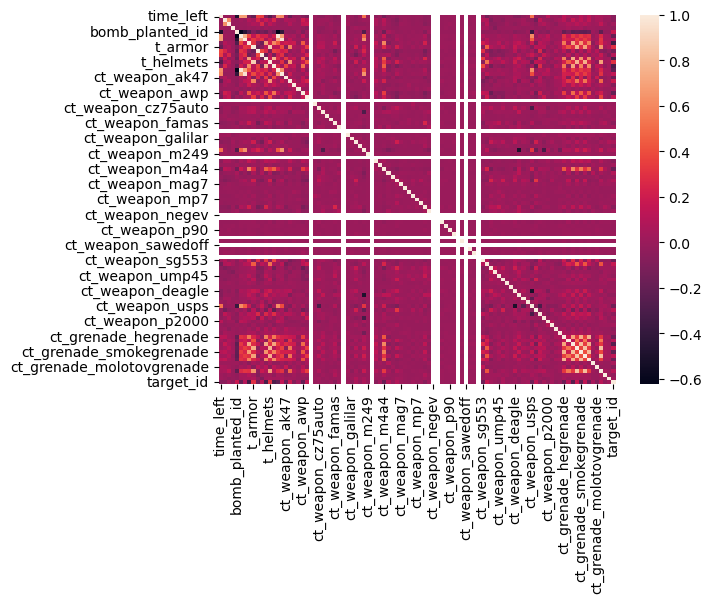

In [33]:
sns.heatmap(train_float.corr())

Кегле, общее кол-во, избыточность, хит-мап

In [34]:
for i in train_float.columns:
    print(i, (train_float['target_id'].corr(train_float[i])))

time_left -0.06671271650519538
ct_score -0.05847850747325189
t_score 0.02627930900750031
map_id -0.03615784590781996
bomb_planted_id 0.181186362867903
ct_health -0.18805352050339844
t_health 0.09455411598042768
ct_armor -0.3336139147135128
t_armor 0.29056856024457955
ct_money -0.12932094714506687
t_money 0.09919242156712026
ct_helmets -0.3061317533332913
t_helmets 0.298356718104416
ct_defuse_kits -0.29066331980952076
ct_players_alive -0.21424481675729476
t_players_alive 0.14576455482607542
ct_weapon_ak47 -0.16718072560508754
t_weapon_ak47 0.19189416686767122
ct_weapon_aug -0.08025183801278643
t_weapon_aug 0.03522457904404024
ct_weapon_awp -0.19885570034821165
t_weapon_awp 0.1492010676310484
ct_weapon_bizon nan
t_weapon_bizon 0.002281296200515965
ct_weapon_cz75auto 0.012903462535854797
t_weapon_cz75auto -0.011563622979784673
ct_weapon_elite -0.016926246184658583
t_weapon_elite 0.011589281740555115
ct_weapon_famas -0.04953185795893228
t_weapon_famas 0.03734648789278674
ct_weapon_g3sg1 na

In [35]:
train_float_copy = train_float.copy(deep=True)
train_float_copy.drop(columns=['ct_weapon_bizon', 'ct_weapon_g3sg1', 't_weapon_m249',
                                'ct_weapon_negev', 't_weapon_negev', 'ct_weapon_r8revolver',
                                't_weapon_scar20', 'ct_weapon_sawedoff'], inplace=True)

In [36]:
for i in train_float_copy.columns:
    print(i, (train_float_copy['target_id'].corr(train_float_copy[i])))

time_left -0.06671271650519538
ct_score -0.05847850747325189
t_score 0.02627930900750031
map_id -0.03615784590781996
bomb_planted_id 0.181186362867903
ct_health -0.18805352050339844
t_health 0.09455411598042768
ct_armor -0.3336139147135128
t_armor 0.29056856024457955
ct_money -0.12932094714506687
t_money 0.09919242156712026
ct_helmets -0.3061317533332913
t_helmets 0.298356718104416
ct_defuse_kits -0.29066331980952076
ct_players_alive -0.21424481675729476
t_players_alive 0.14576455482607542
ct_weapon_ak47 -0.16718072560508754
t_weapon_ak47 0.19189416686767122
ct_weapon_aug -0.08025183801278643
t_weapon_aug 0.03522457904404024
ct_weapon_awp -0.19885570034821165
t_weapon_awp 0.1492010676310484
t_weapon_bizon 0.002281296200515965
ct_weapon_cz75auto 0.012903462535854797
t_weapon_cz75auto -0.011563622979784673
ct_weapon_elite -0.016926246184658583
t_weapon_elite 0.011589281740555115
ct_weapon_famas -0.04953185795893228
t_weapon_famas 0.03734648789278674
t_weapon_g3sg1 0.004420343055307851
ct

In [38]:
values_list = []
for i in train_float_copy.columns:
    values_list.append(train_float_copy['target_id'].corr(train_float_copy[i]))
corr_dict = dict(zip(train_float_copy.columns, values_list))
sorted_ = sorted(corr_dict.items(), key=lambda item: item[1])
sorted_[::-1]

[('target_id', 1.0),
 ('t_helmets', 0.298356718104416),
 ('t_armor', 0.29056856024457955),
 ('t_weapon_ak47', 0.19189416686767122),
 ('bomb_planted_id', 0.181186362867903),
 ('t_grenade_flashbang', 0.1689217672095301),
 ('t_weapon_sg553', 0.16628527475874244),
 ('t_weapon_awp', 0.1492010676310484),
 ('t_players_alive', 0.14576455482607542),
 ('t_grenade_smokegrenade', 0.14190749140708725),
 ('t_weapon_usps', 0.13619380413206858),
 ('t_grenade_molotovgrenade', 0.11766080076833331),
 ('t_grenade_hegrenade', 0.11589134288504704),
 ('t_money', 0.09919242156712026),
 ('t_health', 0.09455411598042768),
 ('t_weapon_mac10', 0.0902843331578504),
 ('t_weapon_m4a4', 0.089421697309835),
 ('t_weapon_glock', 0.07272413623432222),
 ('t_weapon_galilar', 0.0667601323799287),
 ('t_weapon_ump45', 0.06583044276527783),
 ('t_grenade_incendiarygrenade', 0.0521681194472302),
 ('t_weapon_p250', 0.04399214054036076),
 ('ct_weapon_ssg08', 0.04097036992901705),
 ('t_weapon_fiveseven', 0.03827741829784059),
 ('t_

In [65]:
new_data = pd.DataFrame()
for i, value in sorted_[len(sorted_)-20:]:
    new_data[i] = train_float_copy[i]
new_data

,t_weapon_ump45,t_weapon_galilar,t_weapon_glock,t_weapon_m4a4,t_weapon_mac10,t_health,t_money,t_grenade_hegrenade,t_grenade_molotovgrenade,t_weapon_usps,t_grenade_smokegrenade,t_players_alive,t_weapon_awp,t_weapon_sg553,t_grenade_flashbang,bomb_planted_id,t_weapon_ak47,t_armor,t_helmets,target_id
0,0.0,0.0,1.0,0.0,0.0,500.0,10200.0,0.0,2.0,0.0,1.0,5.0,0.0,0.0,2.0,0,0.0,400.0,2.0,0
1,0.0,0.0,5.0,0.0,0.0,500.0,13950.0,1.0,5.0,0.0,5.0,5.0,1.0,0.0,5.0,0,4.0,500.0,5.0,1
2,0.0,0.0,0.0,0.0,0.0,200.0,7200.0,0.0,2.0,0.0,2.0,2.0,2.0,0.0,2.0,0,0.0,200.0,2.0,0
3,0.0,1.0,3.0,0.0,0.0,268.0,1750.0,1.0,0.0,0.0,2.0,4.0,0.0,0.0,1.0,1,3.0,385.0,4.0,1
4,0.0,0.0,4.0,0.0,0.0,500.0,650.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,1.0,0,0.0,300.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82009,0.0,0.0,4.0,0.0,0.0,400.0,11350.0,0.0,4.0,0.0,2.0,4.0,1.0,0.0,3.0,0,3.0,345.0,4.0,0
82010,0.0,0.0,4.0,0.0,1.0,379.0,10750.0,0.0,1.0,0.0,0.0,4.0,0.0,1.0,3.0,0,2.0,357.0,4.0,1
82011,0.0,0.0,3.0,0.0,0.0,500.0,1350.0,1.0,1.0,0.0,2.0,5.0,0.0,3.0,2.0,0,0.0,300.0,2.0,0
82012,0.0,1.0,2.0,0.0,0.0,500.0,9400.0,0.0,1.0,0.0,2.0,5.0,0.0,0.0,2.0,0,0.0,200.0,1.0,0


In [66]:
new_data_test = pd.DataFrame()
for i, value in sorted_[len(sorted_)-20:]:
    new_data_test[i] = test[i]
new_data_test

,t_weapon_ump45,t_weapon_galilar,t_weapon_glock,t_weapon_m4a4,t_weapon_mac10,t_health,t_money,t_grenade_hegrenade,t_grenade_molotovgrenade,t_weapon_usps,t_grenade_smokegrenade,t_players_alive,t_weapon_awp,t_weapon_sg553,t_grenade_flashbang,bomb_planted_id,t_weapon_ak47,t_armor,t_helmets,target_id
0,0.0,0.0,4.0,0.0,0.0,500.0,10400.0,1.0,1.0,0.0,5.0,5.0,1.0,3.0,3.0,0,1.0,491.0,5.0,0
1,0.0,0.0,3.0,0.0,0.0,500.0,27050.0,1.0,4.0,0.0,5.0,5.0,1.0,1.0,5.0,0,3.0,484.0,5.0,1
2,0.0,0.0,4.0,0.0,0.0,500.0,500.0,0.0,1.0,0.0,0.0,5.0,0.0,0.0,2.0,0,0.0,200.0,0.0,0
3,0.0,0.0,3.0,0.0,0.0,320.0,18850.0,1.0,2.0,0.0,3.0,4.0,1.0,0.0,1.0,0,3.0,311.0,4.0,1
4,0.0,0.0,5.0,0.0,0.0,422.0,23100.0,0.0,0.0,0.0,1.0,5.0,0.0,2.0,3.0,1,3.0,415.0,5.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,1
40392,0.0,0.0,5.0,0.0,0.0,500.0,4000.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0
40393,0.0,0.0,0.0,0.0,0.0,485.0,8850.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,1.0,0,0.0,493.0,2.0,1
40394,0.0,0.0,5.0,0.0,0.0,498.0,23900.0,0.0,2.0,0.0,3.0,5.0,1.0,1.0,3.0,0,3.0,499.0,5.0,0


In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
lr = LogisticRegression()


In [69]:
X_train =  new_data.drop("target_id", axis=1)
y_train = new_data["target_id"]

In [70]:
lr.fit(X_train, y_train)

LogisticRegression()

In [71]:
predict = lr.predict(new_data_test.drop("target_id", axis=1))

In [72]:
from sklearn.metrics import classification_report

In [73]:
print(classification_report(predict, new_data_test["target_id"]))

              precision    recall  f1-score   support

           0       0.30      0.50      0.38     12112
           1       0.70      0.50      0.58     28284

    accuracy                           0.50     40396
   macro avg       0.50      0.50      0.48     40396
weighted avg       0.58      0.50      0.52     40396



In [78]:
from sklearn.decomposition import PCA

# Создание объекта PCA
pca = PCA(n_components=2)  # Указываем количество компонент

# Преобразование данных
X_transformed = pca.fit_transform(train_float.drop("target_id", axis=1))

In [84]:
lr.fit(X_transformed, y_train)
predict = lr.predict(pca.fit_transform(test_float.drop("target_id", axis=1)))
print(classification_report(predict, test_float["target_id"]))

              precision    recall  f1-score   support

           0       0.46      0.50      0.48     18701
           1       0.54      0.50      0.52     21695

    accuracy                           0.50     40396
   macro avg       0.50      0.50      0.50     40396
weighted avg       0.50      0.50      0.50     40396



In [102]:
despair = pd.concat([train_float, test_float], axis=0)
despair

,time_left,ct_score,t_score,map_id,bomb_planted_id,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,target_id
0,114.95,4.0,0.0,2,0,500.0,500.0,493.0,400.0,3600.0,...,2.0,5.0,1.0,4.0,0.0,0.0,2.0,0.0,0.0,0
1,114.92,7.0,4.0,1,0,500.0,500.0,0.0,500.0,11950.0,...,5.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,1
2,74.88,4.0,6.0,5,0,270.0,200.0,292.0,200.0,1700.0,...,2.0,1.0,2.0,0.0,0.0,1.0,2.0,1.0,0.0,0
3,21.46,1.0,1.0,4,1,100.0,268.0,100.0,385.0,150.0,...,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,175.00,9.0,6.0,3,0,500.0,500.0,200.0,300.0,2700.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40391,27.41,4.0,5.0,7,1,271.0,0.0,300.0,0.0,2550.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
40392,175.00,7.0,8.0,4,0,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
40393,94.95,14.0,7.0,7,0,500.0,485.0,486.0,493.0,29650.0,...,1.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1
40394,77.27,18.0,18.0,6,0,500.0,498.0,500.0,499.0,19150.0,...,3.0,1.0,3.0,1.0,0.0,0.0,2.0,0.0,0.0,0


In [92]:
# from sklearn.utils import shuffle
# despair = shuffle(despair)
# despair

,time_left,ct_score,t_score,map_id,bomb_planted_id,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,target_id
18271,174.95,13.0,3.0,1,0,500.0,500.0,293.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4099,114.95,9.0,4.0,3,0,500.0,500.0,467.0,500.0,22300.0,...,3.0,5.0,4.0,5.0,0.0,0.0,3.0,0.0,0.0,0
68337,174.91,12.0,1.0,4,0,500.0,500.0,296.0,0.0,30950.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
15929,174.93,6.0,11.0,2,0,500.0,500.0,144.0,74.0,13500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
28337,175.00,7.0,8.0,4,0,500.0,500.0,200.0,100.0,2700.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2850,74.81,2.0,1.0,5,0,500.0,498.0,400.0,457.0,400.0,...,2.0,2.0,4.0,0.0,0.0,0.0,2.0,1.0,0.0,0
28167,174.93,10.0,10.0,2,0,500.0,500.0,0.0,268.0,25350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
26626,75.12,10.0,14.0,2,0,489.0,295.0,463.0,197.0,4100.0,...,2.0,4.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0
64862,175.00,6.0,9.0,5,0,500.0,500.0,300.0,100.0,1250.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [93]:
from sklearn.model_selection import train_test_split

In [103]:
X_train, X_test, y_train, y_test = train_test_split(despair.drop("target_id", axis=1), despair["target_id"], test_size=0.2,stratify=despair["target_id"],  random_state=42)

In [104]:
lr.fit(X_train, y_train)
predict = lr.predict(X_test)
print(classification_report(predict, y_test))

              precision    recall  f1-score   support

           0       0.61      0.68      0.64     10992
           1       0.71      0.65      0.68     13490

    accuracy                           0.66     24482
   macro avg       0.66      0.66      0.66     24482
weighted avg       0.67      0.66      0.66     24482



C:\Users\nudan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [108]:
from sklearn.decomposition import PCA

# Создание объекта PCA
pca = PCA(n_components=2)  # Указываем количество компонент

# Преобразование данных
X_transformed = pca.fit_transform(X_train)

In [110]:
lr.fit(X_transformed, y_train)
predict = lr.predict(pca.fit_transform(X_test))
print(classification_report(predict, y_test))

              precision    recall  f1-score   support

           0       0.51      0.58      0.54     10713
           1       0.63      0.57      0.60     13769

    accuracy                           0.57     24482
   macro avg       0.57      0.57      0.57     24482
weighted avg       0.58      0.57      0.57     24482



In [111]:
from sklearn.utils import shuffle
test_float = shuffle(test_float)
test_float

,time_left,ct_score,t_score,map_id,bomb_planted_id,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,target_id
3534,169.94,5.0,7.0,7,0,500.0,500.0,0.0,394.0,11600.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
1822,94.92,0.0,0.0,6,0,500.0,500.0,300.0,300.0,550.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8660,74.91,7.0,11.0,5,0,500.0,498.0,471.0,434.0,1300.0,...,3.0,4.0,3.0,1.0,0.0,0.0,1.0,0.0,0.0,0
9804,54.91,9.0,7.0,7,0,200.0,166.0,200.0,164.0,100.0,...,2.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
7633,165.66,20.0,19.0,3,0,500.0,500.0,200.0,500.0,32650.0,...,5.0,2.0,5.0,1.0,0.0,0.0,5.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2687,175.00,8.0,5.0,3,0,500.0,500.0,475.0,400.0,25350.0,...,4.0,5.0,4.0,5.0,0.0,0.0,4.0,0.0,0.0,0
22490,114.91,3.0,1.0,7,0,500.0,500.0,396.0,488.0,5100.0,...,4.0,4.0,3.0,3.0,0.0,0.0,2.0,0.0,0.0,1
24042,94.95,8.0,9.0,1,0,400.0,412.0,400.0,468.0,200.0,...,5.0,3.0,3.0,0.0,0.0,0.0,5.0,0.0,0.0,0
19209,175.00,11.0,4.0,5,0,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [112]:
lr.fit(train_float.drop("target_id", axis=1), train_float["target_id"])
predict = lr.predict(test_float.drop("target_id", axis=1))
print(classification_report(predict, test_float["target_id"]))

              precision    recall  f1-score   support

           0       0.46      0.50      0.48     18604
           1       0.54      0.50      0.52     21792

    accuracy                           0.50     40396
   macro avg       0.50      0.50      0.50     40396
weighted avg       0.50      0.50      0.50     40396



C:\Users\nudan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [113]:
pip install pycaret

     -------------------------------------- 483.9/483.9 kB 3.4 MB/s eta 0:00:00
     -------------------------------------- 106.8/106.8 kB 6.0 MB/s eta 0:00:00
     ---------------------------------------- 1.3/1.3 MB 10.4 MB/s eta 0:00:00
     --------------------------------------- 65.9/65.9 MB 10.9 MB/s eta 0:00:00
     ---------------------------------------- 44.0/44.0 kB ? eta 0:00:00
     ---------------------------------------- 569.7/569.7 kB ? eta 0:00:00
     ---------------------------------------- 73.4/73.4 kB 3.9 MB/s eta 0:00:00
     --------------------------------------- 17.1/17.1 MB 13.6 MB/s eta 0:00:00
     -------------------------------------- 153.4/153.4 kB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 81.8/81.8 kB ? eta 0:00:00
     ---------------------------------------- 134.8/134.8 kB ? eta 0:00:00
     --------------------------------------

In [114]:
from pycaret.classification import *

In [115]:
clf = setup(train.drop("target_id", axis=1), target=train["target_id"], session_id=42)

,Description,Value
0,Session id,42
1,Target,target_id
2,Target type,Binary
3,Original data shape,"(82014, 100)"
4,Transformed data shape,"(82014, 107)"
5,Transformed train set shape,"(57409, 107)"
6,Transformed test set shape,"(24605, 107)"
7,Ordinal features,1
8,Numeric features,96
9,Categorical features,2


In [117]:
best_model = compare_models(n_select = 5, fold=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.7560
ridge,Ridge Classifier,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.7620
rf,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,3.7440
ada,Ada Boost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.3640
gbc,Gradient Boosting Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,10.2680
et,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,4.8380
xgboost,Extreme Gradient Boosting,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,2.4640
lightgbm,Light Gradient Boosting Machine,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,2.2940
qda,Quadratic Discriminant Analysis,0.9999,0.9999,0.9998,1.0000,0.9999,0.9998,0.9998,2.3620
lr,Logistic Regression,0.9244,0.9711,0.9308,0.9215,0.9261,0.8488,0.8489,14.6380


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [118]:
X_train, X_test, y_train, y_test = train_test_split(train_float.drop("target_id", axis=1), train_float["target_id"], test_size=0.2,stratify=train_float["target_id"],  random_state=42)

In [119]:
lr.fit(X_train, y_train)
predict = lr.predict(X_test)
print(classification_report(predict, y_test))

              precision    recall  f1-score   support

           0       0.71      0.75      0.73      7688
           1       0.77      0.74      0.75      8715

    accuracy                           0.74     16403
   macro avg       0.74      0.74      0.74     16403
weighted avg       0.74      0.74      0.74     16403

